#  Grip Sparks Foundation
##  Data Science and Business Analytics Internship
###  Nader Salama
### Task 1: Prediction using Supervised Machine Learning.

>In this task we will predict the percentage score of a student based on the number of study hours using __Supervised Machine Learning and Simple Linear Regression.__

### Topics Glossary

- [Part I - Exploring the Data](#a)
- [Part II - Data Visualization](#b)
- [Part III - Preparing the data](#c)
- [Part IV - Creating a Training and Predicting Pipeline](#d)
- [Part V - Model Evaluation](#e)
- [Part VI - Conclusion](#f)

<a id='a'></a>
## Part I - Exploring the Data

In [38]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# Pretty display for notebooks
%matplotlib inline
#Setting the seed to assure you get the same answers.
random.seed(7)

In [39]:
# Reading data from remote link
url = "http://bit.ly/w-data"
# Load dataset
data = pd.read_csv(url)
print("Data imported successfully")

# Success - Display the first 5 record
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
#Let's check the size of our dataset.
print('Dataset have a {} Rows & 2 Columns'.format(data.shape[0]))

Dataset have a 25 Rows & 2 Columns


In [41]:
#Let's Look at the whole dataset to gain some information about it's data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


> __We can see that dataset has no null values & Dtypes are in correct type.__

In [42]:
#Some statistical information to have a clear view of dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<a id='b'></a>
## Part II - Data Visualization

>Let's try to visualize our dataset on 2-D graph to see if we can find any relationship between the data. using my one of my favourite libraries __(Plotly)__.

In [43]:
# Plotting the distribution of scores using a scatter plot.

# Importing plotly & plotting our data to get more insights.
import plotly.express as px
fig = px.scatter(data,x='Hours', y='Scores', color=data['Scores'],
                 size=data['Hours'])
fig.update_layout(
    title="Hours vs Percentage",
    font=dict(
        family="Courier New, monospace",
        size=14,
    )
)
fig.show()

>**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

<a id='#c'></a>
## Part III - Preparing the data

In [124]:
#Split the data into features (X) and target label (y).
X = data.drop('Scores', axis = 1) 
y = data['Scores'] 

We will now split the data __(both features and their labels)__ into training and test sets. __80% of the data will be used for training and 20% for testing.__

In [125]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 5 samples.


<a id='d'></a>
## Part IV - Creating a Training and Predicting Pipeline
>We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

* A linear regression line has an equation of the form __Y = a + bX__, where X is the __explanatory variable__ and Y is the __dependent variable.__ The slope of the line is b, and a is the intercept.

### Training Model

In [126]:
#Import Linear Reg & train it.
from sklearn.linear_model import LinearRegression  
regressor_model = LinearRegression()  
regressor_model.fit(X_train, y_train);

In [127]:
#Let's see our b value
regressor_model.coef_

array([9.91065648])

In [128]:
#Let's see our a value
regressor_model.intercept_

2.018160041434683

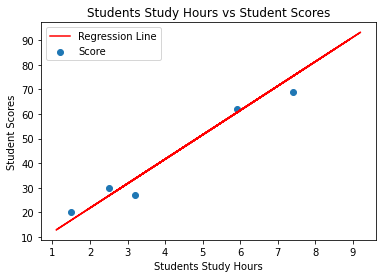

In [129]:
# Plotting the regression lineusing the equation we discussed above.
line = regressor.coef_*X+regressor.intercept_

#Plotting test data with regression fitted Line.
plt.scatter(X_test, y_test, label = "Score")
plt.xlabel("Students Study Hours")
plt.ylabel("Student Scores")
plt.title("Students Study Hours vs Student Scores")
plt.plot(X_train, regressor_model.predict(X_train), color = "red" , label = "Regression Line")
plt.legend()
plt.show()

### Model Prediction
>__Now that we have trained our algorithm, it's time to make some predictions.__

In [130]:
# Predicting the scores
y_pred = regressor_model.predict(X_test)

In [131]:
# Comparing Actual vs Predicted
Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Comparison 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


>We can see that our model is really near the actual value, We should check __R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error)__ later on.

### Testing Model

In [132]:
# Now let's test a new value & check the model prediction.
hours = [[9.25]]
own_pred = regressor_model.predict(hours)
print("No of Hours = {}".format(*hours[0]))
print("Predicted Score = {:.2f}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69


<a id='e'></a>
## Part V - Model Evaluation

>The final step is to evaluate the performance of algorithm. This step is a really important step to make to compare how well different algorithms perform.

In [144]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
print('Linear Regression Model')
print('mean_absolute_error would be {}'.format(mean_absolute_error(y_test , y_pred)))
print('mean_squared_error would be {}'.format(mean_squared_error(y_test , y_pred)))
print('r2_score would be {}'.format(r2_score(y_test , y_pred)))
print('---------------------------')

Linear Regression Model
mean_absolute_error would be 4.183859899002975
mean_squared_error would be 21.5987693072174
r2_score would be 0.9454906892105356
---------------------------


<a id='f'></a>
## Part VI - Conclusion
>We can see that our model has a great performance as we can see the __R2_score is close to 1 with a value of 0.945__ which a good indicator that it's a good model.

>We can also conclude that if the __student studies for 9.25 hrs/day, then according to our model they should score 93.69%__